## 📊 Notebook 2: Data Preprocessing Notebook

#### Goal: Structured codes to preprocess the data from PostgreSQL database.

In [20]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv('../data/Telco-Customer-Churn.csv')
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [21]:
# Basic structure
df.info()

# Summary stats
df.describe()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


#### 1. Data Cleaning

In [22]:
# Check for nulls and duplicates
print(df.isnull().sum())
print("Duplicates:", df.duplicated().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
Duplicates: 0


In [23]:
# Check blank spaces in entire DataFrame
blank_counts = (df.map(lambda x: isinstance(x, str) and x.strip() == '')).sum()
print(blank_counts)


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


In [24]:
# Convert 'TotalCharges' to numeric, set invalids to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check for nulls again
df.isnull().sum()


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [25]:
# Drop rows with NaN in 'TotalCharges'
# Reset index after dropping
df = df.dropna(subset=['TotalCharges']).reset_index(drop=True)

# Check if 'TotalCharges' is now clean
print(df['TotalCharges'].isnull().sum())

0


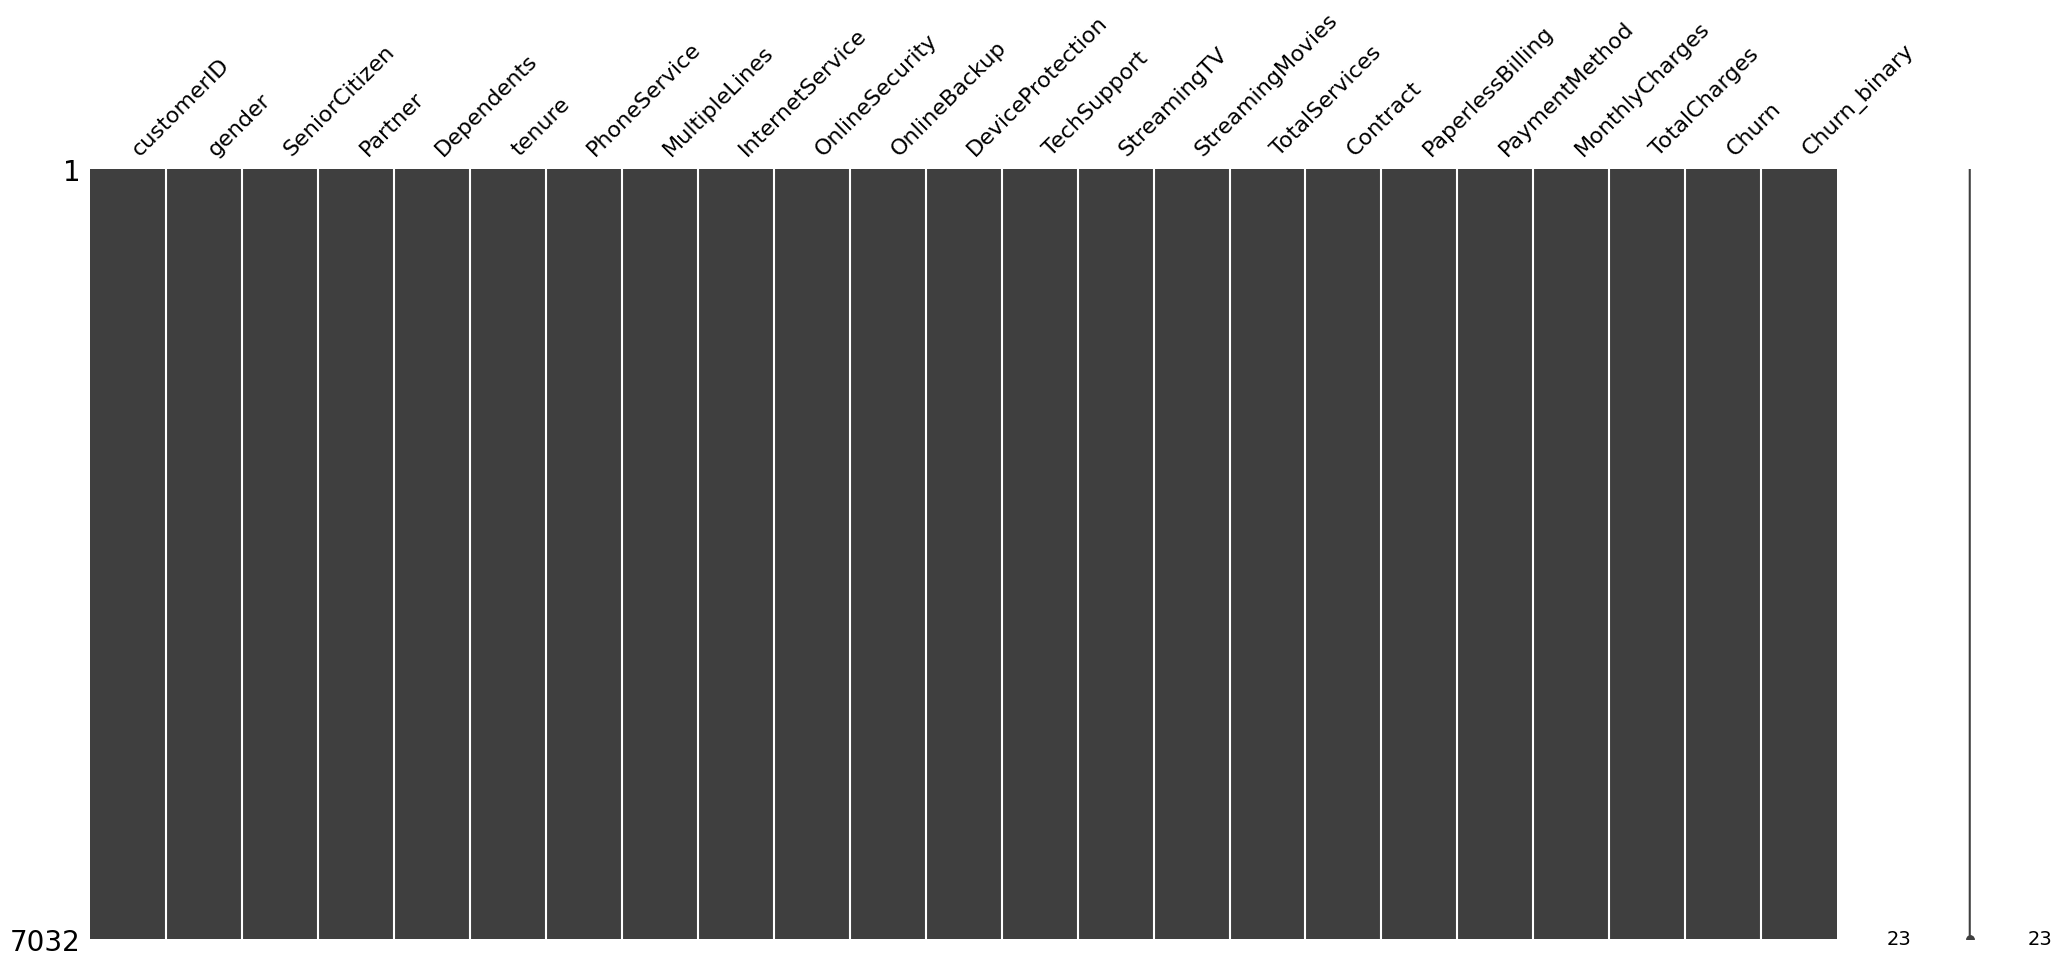

In [66]:
from matplotlib import pyplot as plt
import missingno as msno
msno.matrix(df)
plt.show()


In [26]:
# SeniorCitizen from int to category
df['SeniorCitizen'] = df['SeniorCitizen'].astype('category')

# Churn from Yes/No to 1/0
df['Churn_binary'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Print Info for Churn and SeniorCitizen
print(df[['Churn', 'SeniorCitizen', 'Churn_binary']].info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Churn          7032 non-null   object  
 1   SeniorCitizen  7032 non-null   category
 2   Churn_binary   7032 non-null   int64   
dtypes: category(1), int64(1), object(1)
memory usage: 117.0+ KB
None


In [27]:
# Remove whitespaces, replace spaces with underscores
df.columns = df.columns.str.strip().str.replace(' ', '_')

# Print cleaned column names
print(df.columns.tolist())


['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'Churn_binary']


In [28]:
# Define service columns
service_cols = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Count number of 'Yes' services per customer
df['TotalServices'] = df[service_cols].apply(lambda x: sum(x == 'Yes'), axis=1)
# Print the first few rows to check the new column
print(df.head())

   customerID  gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female             0     Yes         No       1           No   
1  5575-GNVDE    Male             0      No         No      34          Yes   
2  3668-QPYBK    Male             0      No         No       2          Yes   
3  7795-CFOCW    Male             0      No         No      45           No   
4  9237-HQITU  Female             0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... StreamingTV  \
0  No phone service             DSL             No  ...          No   
1                No             DSL            Yes  ...          No   
2                No             DSL            Yes  ...          No   
3  No phone service             DSL            Yes  ...          No   
4                No     Fiber optic             No  ...          No   

  StreamingMovies        Contract PaperlessBilling              PaymentMethod  \
0              No

In [29]:
# Reorder columns: insert TotalServices after StreamingMovies
cols = df.columns.tolist()

# Find the index of StreamingMovies
idx = cols.index('StreamingMovies')

# Remove TotalServices from end and insert after StreamingMovies
cols.insert(idx + 1, cols.pop(cols.index('TotalServices')))

# Reorder DataFrame
df = df[cols]

# Print first few rows to check the new order
print(df.head())


   customerID  gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female             0     Yes         No       1           No   
1  5575-GNVDE    Male             0      No         No      34          Yes   
2  3668-QPYBK    Male             0      No         No       2          Yes   
3  7795-CFOCW    Male             0      No         No      45           No   
4  9237-HQITU  Female             0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... StreamingTV  \
0  No phone service             DSL             No  ...          No   
1                No             DSL            Yes  ...          No   
2                No             DSL            Yes  ...          No   
3  No phone service             DSL            Yes  ...          No   
4                No     Fiber optic             No  ...          No   

  StreamingMovies TotalServices        Contract PaperlessBilling  \
0              No             

In [30]:
# Confirm data types and stats
df.info()
df.describe()

# Optional: preview cleaned dataset
df.sample(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7032 non-null   object  
 1   gender            7032 non-null   object  
 2   SeniorCitizen     7032 non-null   category
 3   Partner           7032 non-null   object  
 4   Dependents        7032 non-null   object  
 5   tenure            7032 non-null   int64   
 6   PhoneService      7032 non-null   object  
 7   MultipleLines     7032 non-null   object  
 8   InternetService   7032 non-null   object  
 9   OnlineSecurity    7032 non-null   object  
 10  OnlineBackup      7032 non-null   object  
 11  DeviceProtection  7032 non-null   object  
 12  TechSupport       7032 non-null   object  
 13  StreamingTV       7032 non-null   object  
 14  StreamingMovies   7032 non-null   object  
 15  TotalServices     7032 non-null   int64   
 16  Contract          7032 n

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,TotalServices,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_binary
4466,1139-WUOAH,Male,0,No,No,57,No,No phone service,DSL,No,...,Yes,Yes,4,Two year,No,Credit card (automatic),53.35,3090.05,No,0
4014,4255-DDUOU,Female,0,Yes,Yes,1,Yes,No,No,No internet service,...,No internet service,No internet service,1,Month-to-month,Yes,Mailed check,20.50,20.50,Yes,1
303,8181-YHCMF,Female,0,Yes,Yes,68,No,No phone service,DSL,No,...,Yes,Yes,5,Two year,No,Credit card (automatic),60.30,4109.00,No,0
6304,0754-UKWQP,Male,0,No,No,2,Yes,No,Fiber optic,No,...,Yes,Yes,4,Month-to-month,Yes,Electronic check,95.85,197.70,Yes,1
1242,9408-HRXRK,Female,0,Yes,Yes,45,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,6,Month-to-month,Yes,Electronic check,105.15,4730.90,No,0


In [31]:
# ✅ Save cleaned data
df.to_csv('../data/cleaned_telco_churn.csv', index=False)


### Data Processing for ML Predicitions

#### Step 1: Boxplots to Visually Detect Outliers

Matplotlib is building the font cache; this may take a moment.


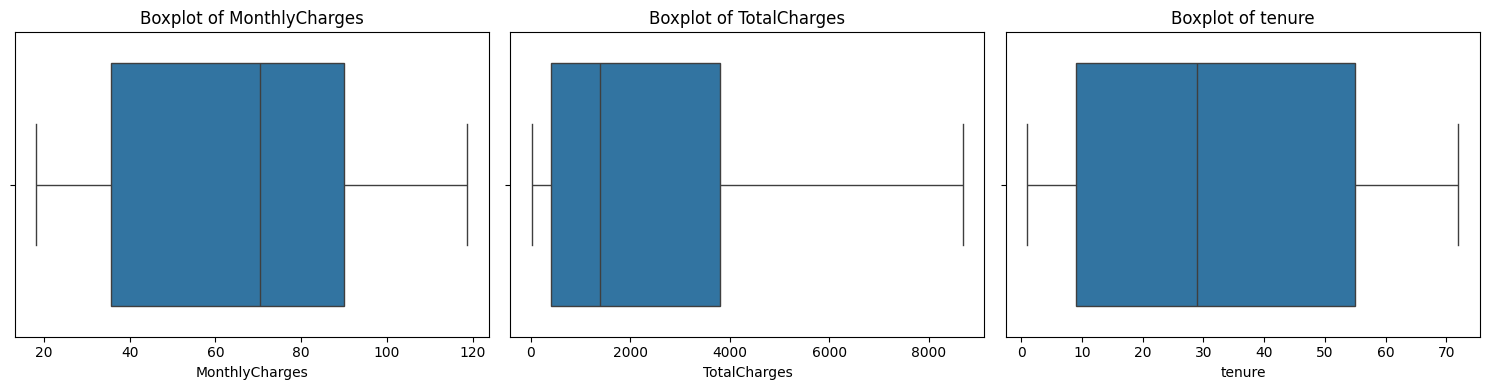

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Columns to check for outliers
numeric_cols = ['MonthlyCharges', 'TotalCharges', 'tenure']
df_cleaned = df.copy()

# Plotting boxplots
plt.figure(figsize=(15, 4))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=df_cleaned[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


#### Step 2: Print IQR Boundaries and Count Potential Outliers

In [34]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    print(f"{column} -> Outliers: {len(outliers)} | Lower Bound: {lower_bound:.2f} | Upper Bound: {upper_bound:.2f}")
    return outliers

# Apply on key columns
for col in ['MonthlyCharges', 'TotalCharges', 'tenure']:
    detect_outliers_iqr(df_cleaned, col)


MonthlyCharges -> Outliers: 0 | Lower Bound: -45.82 | Upper Bound: 171.27
TotalCharges -> Outliers: 0 | Lower Bound: -4688.48 | Upper Bound: 8884.67
tenure -> Outliers: 0 | Lower Bound: -60.00 | Upper Bound: 124.00


#### Outlier Detection Insights

##### Methodology:

Applied boxplot analysis using IQR (Interquartile Range) method on key numerical columns to detect outliers.

Calculated lower and upper bounds for each column to identify extreme outliers.

##### Key Observations:

No outliers detected in the numerical columns, all data points lie within acceptable bounds.

This indicates the dataset is already well-distributed after previous cleaning steps and does not require further trimming.

Retention of all data points ensures better model generalization by capturing customer behavior across full range of charges and tenure.

##### Conclusion:

No rows were removed during outlier treatment. The dataset remains intact for further preprocessing steps like encoding and scaling.

#### Step 3: Code for Scaling

In [35]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Columns to scale
num_cols = ['MonthlyCharges', 'TotalCharges', 'tenure']

# Apply scaling
df_scaled = df.copy()
df_scaled[num_cols] = scaler.fit_transform(df_scaled[num_cols])

# Verification
df_scaled[num_cols].describe()


,MonthlyCharges,TotalCharges,tenure
count,7.032000e+03,7.032000e+03,7.032000e+03
mean,6.062651e-17,-1.119064e-16,-1.126643e-16
std,1.000071e+00,1.000071e+00,1.000071e+00
min,-1.547283e+00,-9.990692e-01,-1.280248e+00
25%,-9.709769e-01,-8.302488e-01,-9.542963e-01
50%,1.845440e-01,-3.908151e-01,-1.394171e-01
75%,8.331482e-01,6.668271e-01,9.199259e-01
max,1.793381e+00,2.824261e+00,1.612573e+00


**StandardScaler was chosen because features have outliers under control and normal distribution is preferable for distance-based models.**

#### Insights After Scaling Process:

Standardized numerical features to have a mean of 0 and standard deviation of 1.

This ensures all features are on the same scale, improving the performance of distance-based models (like KNN, SVM) and accelerating convergence in gradient-based algorithms (like Logistic Regression).

This helps in achieving more stable and accurate predictions during machine learning modeling.



#### Step 4: Encoding Features

##### Label Encoding (Binary Columns)

In [45]:
from sklearn.preprocessing import LabelEncoder
df_encoded = df_scaled.copy()

binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'gender', 'SeniorCitizen']

le = LabelEncoder()
for col in binary_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   int64  
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   int64  
 4   Dependents        7032 non-null   int64  
 5   tenure            7032 non-null   float64
 6   PhoneService      7032 non-null   int64  
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  TotalServices     7032 non-null   int64  
 16  Contract          7032 non-null   object 


Yes → 1, No → 0

For gender: Male → 1, Female → 0

SeniorCitizen is already binary but label encoding ensures consistency.

##### One-Hot Encoding (Multi-Class Columns)

In [46]:
multi_class_cols = ['InternetService', 'Contract', 'PaymentMethod']

df_encoded = pd.get_dummies(df_encoded, columns=multi_class_cols, drop_first=False)
# Check the final DataFrame structure
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7032 non-null   object 
 1   gender                                   7032 non-null   int64  
 2   SeniorCitizen                            7032 non-null   int64  
 3   Partner                                  7032 non-null   int64  
 4   Dependents                               7032 non-null   int64  
 5   tenure                                   7032 non-null   float64
 6   PhoneService                             7032 non-null   int64  
 7   MultipleLines                            7032 non-null   object 
 8   OnlineSecurity                           7032 non-null   object 
 9   OnlineBackup                             7032 non-null   object 
 10  DeviceProtection                         7032 no

In [47]:
# Columns to binary encode
service_columns = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 
                   'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Map Yes -> 1, No/No internet service/No phone service -> 0
for col in service_columns:
    df_encoded[col] = df_encoded[col].map(lambda x: 1 if x == 'Yes' else 0)

df_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 30 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7032 non-null   object 
 1   gender                                   7032 non-null   int64  
 2   SeniorCitizen                            7032 non-null   int64  
 3   Partner                                  7032 non-null   int64  
 4   Dependents                               7032 non-null   int64  
 5   tenure                                   7032 non-null   float64
 6   PhoneService                             7032 non-null   int64  
 7   MultipleLines                            7032 non-null   int64  
 8   OnlineSecurity                           7032 non-null   int64  
 9   OnlineBackup                             7032 non-null   int64  
 10  DeviceProtection                         7032 no

To retain interpretability of all customer segments, especially high-risk churn groups like ‘Month-to-month’ contracts, all one-hot encoded categories are kept.

In [48]:
drop_cols = ['customerID', 'Churn']
df_final_encoded = df_encoded.drop(columns=drop_cols)
print(df_final_encoded.columns.tolist())

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'TotalServices', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn_binary', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']


customerID:	Unique identifier, doesn’t contribute to churn prediction.

Churn: It's a string (Yes/No), i already have Churn_binary for modeling.

#### Feature Engineering

In [56]:
# Bill to tenure ratio
df_final_encoded['BillToTenureRatio'] = (df_cleaned['MonthlyCharges'] / df_cleaned['tenure']).replace([np.inf, -np.inf], 0).fillna(0)

# Average monthly spend per service
df_final_encoded['AvgMonthlySpendPerService'] = (df_cleaned['MonthlyCharges'] / df_cleaned['TotalServices']).replace([np.inf, -np.inf], 0).fillna(0)

# ✅ High Value - Early Risk Customers (High Bill, Low Tenure)
high_bill_threshold = df_cleaned['MonthlyCharges'].quantile(0.75)
df_final_encoded['HighValueRiskCustomer'] = ((df_cleaned['MonthlyCharges'] > high_bill_threshold) & (df_cleaned['tenure'] <= 6)).astype(int)

# ✅ Long Term - Low Spender Customers
low_bill_threshold = df_cleaned['MonthlyCharges'].quantile(0.25)
df_final_encoded['LongTermLowSpender'] = ((df_cleaned['MonthlyCharges'] < low_bill_threshold) & (df_cleaned['tenure'] > 24)).astype(int)

# High Engagement Score
df_final_encoded['EngagementScore'] = df_cleaned['TotalServices'] + (df_cleaned['MonthlyCharges'] / 10) + (df_cleaned['tenure'] / 20)

# Calculate median engagement score and flag high engagement customers
engagement_median = df_final_encoded['EngagementScore'].median()
df_final_encoded['HighEngagementFlag'] = (df_final_encoded['EngagementScore'] >= engagement_median).astype(int)

print(df_final_encoded.columns.tolist())
df_final_encoded.head()


['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'TotalServices', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn_binary', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'BillToTenureRatio', 'AvgMonthlySpendPerService', 'HighValueRiskCustomer', 'LongTermLowSpender', 'EngagementScore', 'HighEngagementFlag']


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,BillToTenureRatio,AvgMonthlySpendPerService,HighValueRiskCustomer,LongTermLowSpender,EngagementScore,HighEngagementFlag
0,0,0,1,0,-1.280248,0,0,0,1,0,...,False,False,True,False,29.850,29.850000,0,0,4.035,0
1,1,0,0,0,0.064303,1,0,1,0,1,...,False,False,False,True,1.675,18.983333,0,0,10.395,0
2,1,0,0,0,-1.239504,1,0,1,1,0,...,False,False,False,True,26.925,17.950000,0,0,8.485,0
3,1,0,0,0,0.512486,0,0,1,0,1,...,True,False,False,False,0.940,14.100000,0,0,9.480,0
4,0,0,0,0,-1.239504,1,0,0,0,0,...,False,False,True,False,35.350,70.700000,0,0,8.170,0


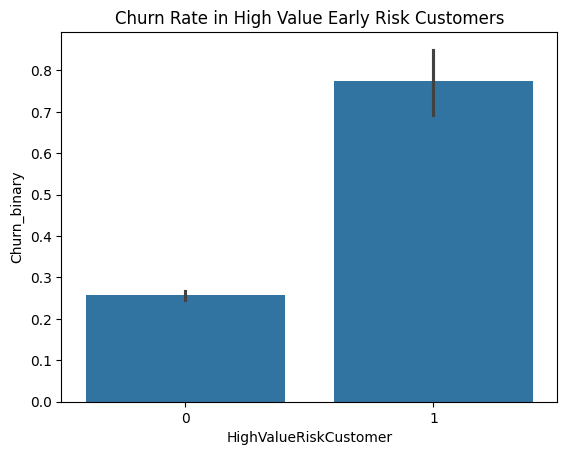

In [67]:
sns.barplot(x='HighValueRiskCustomer', y='Churn_binary', data=df_final_encoded)
plt.title('Churn Rate in High Value Early Risk Customers')
plt.show()


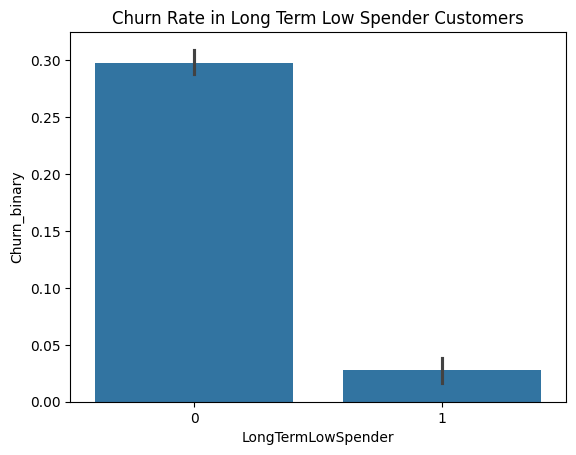

In [68]:
sns.barplot(x='LongTermLowSpender', y='Churn_binary', data=df_final_encoded)
plt.title('Churn Rate in Long Term Low Spender Customers')
plt.show()

In [57]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Columns to scale
num_cols = ['BillToTenureRatio', 'AvgMonthlySpendPerService', 'EngagementScore']

# Apply scaling
df_processed = df_final_encoded.copy()
df_processed[num_cols] = scaler.fit_transform(df_processed[num_cols])

# Verification
df_processed[num_cols].describe()


,BillToTenureRatio,AvgMonthlySpendPerService,EngagementScore
count,7.032000e+03,7.032000e+03,7.032000e+03
mean,7.325704e-17,-1.045807e-16,-2.071406e-16
std,1.000071e+00,1.000071e+00,1.000071e+00
min,-5.107997e-01,-1.881339e+00,-1.677224e+00
25%,-4.490506e-01,-5.661084e-01,-8.406230e-01
50%,-3.958683e-01,-2.147157e-01,-2.251571e-02
75%,-1.228599e-01,1.511800e-01,7.888877e-01
max,5.738519e+00,4.231022e+00,2.221211e+00


#### Correlation Analysis

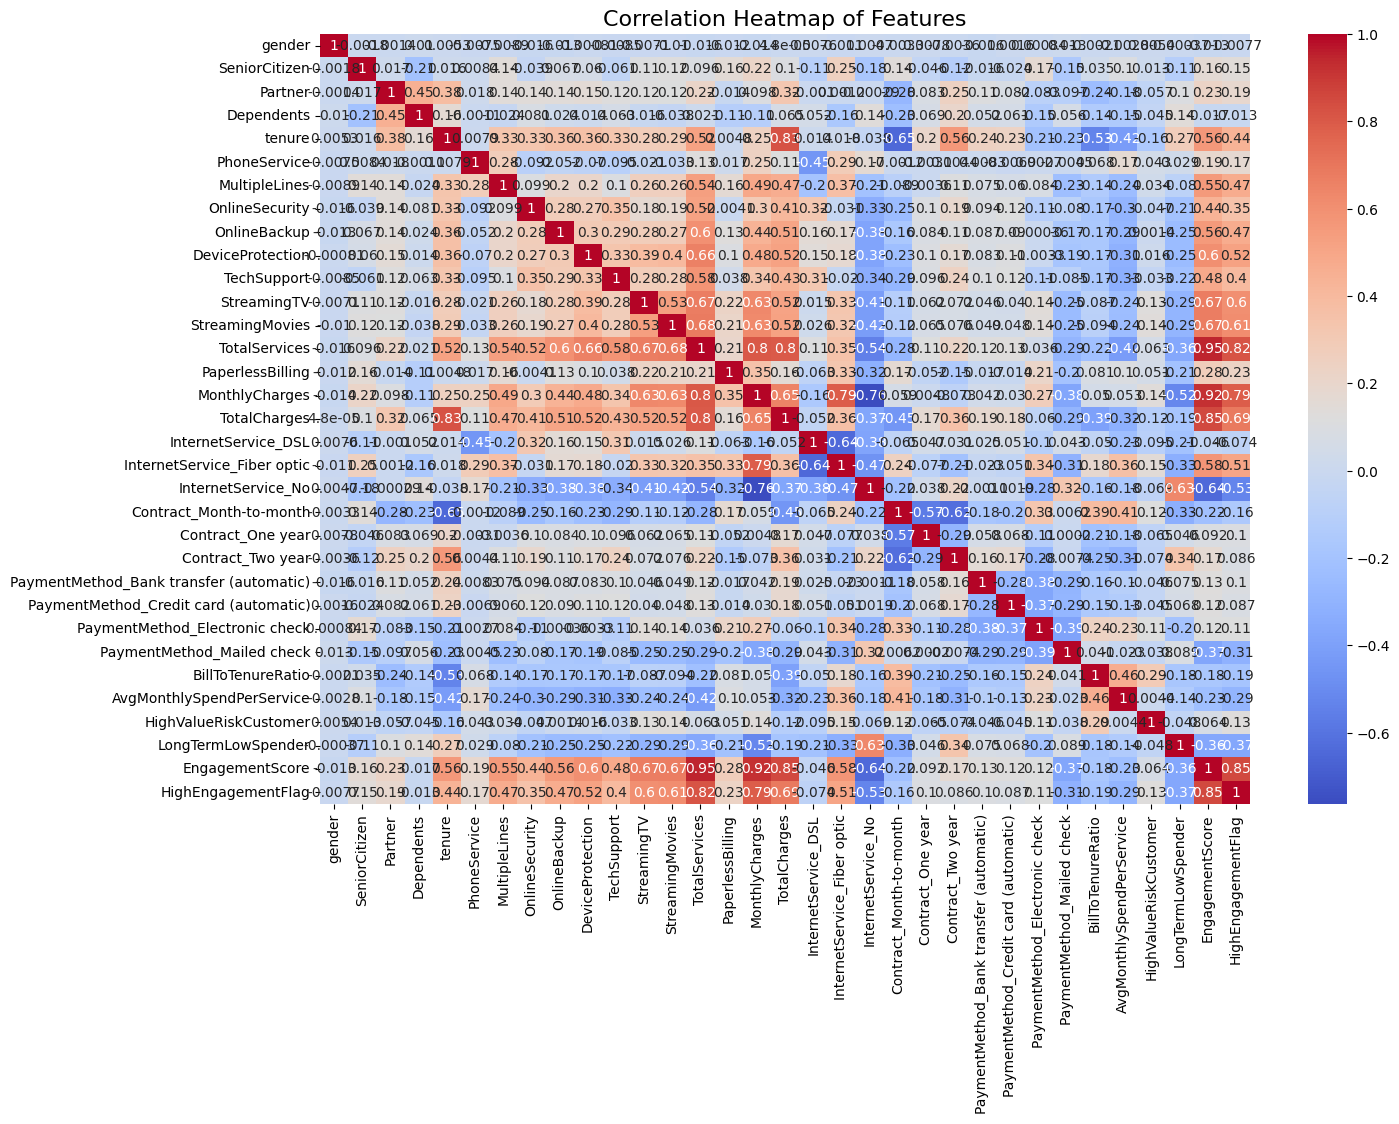

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exclude customerID and target column for multicollinearity check
corr_matrix = df_processed.drop(['Churn_binary'], axis=1).corr()

# Plot full heatmap
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Features", fontsize=16)
plt.show()


✅ Drop	AvgMonthlySpendPerService	Redundant with HighValueRiskCustomer

✅ Drop	EngagementScore	Redundant with HighEngagementFlag

In [60]:
# Correlation with churn specifically
correlation_with_target = df_processed.corr()['Churn_binary'].drop('Churn_binary').sort_values(ascending=False)
print(correlation_with_target)


Contract_Month-to-month                    0.404565
BillToTenureRatio                          0.386065
InternetService_Fiber optic                0.307463
PaymentMethod_Electronic check             0.301455
AvgMonthlySpendPerService                  0.296899
MonthlyCharges                             0.192858
PaperlessBilling                           0.191454
HighValueRiskCustomer                      0.151884
SeniorCitizen                              0.150541
StreamingTV                                0.063254
StreamingMovies                            0.060860
MultipleLines                              0.040033
HighEngagementFlag                         0.017062
PhoneService                               0.011691
EngagementScore                            0.001224
gender                                    -0.008545
DeviceProtection                          -0.066193
TotalServices                             -0.067459
OnlineBackup                              -0.082307
PaymentMetho

##### Top Positive Correlations (Risk factors):

Contract_Month-to-month (0.40)

BillToTenureRatio (0.38)

InternetService_Fiber optic (0.31)

PaymentMethod_Electronic check (0.30)

##### Top Negative Correlations (Retention indicators):

Contract_Two year (-0.30)

tenure (-0.35)

OnlineSecurity, TechSupport, Partner, Dependents, PaymentMethod_Credit card (around -0.15 to -0.17).

##### Low/Negligible Correlation (Almost no impact):

EngagementScore (0.001)

PhoneService (0.01)

HighEngagementFlag (0.01)

StreamingTV, StreamingMovies (~0.06)

gender (-0.008)



#### Dropping Low Impact Features

In [62]:
# ✅ List of features to drop based on low correlation with Churn
features_to_drop = [
    'EngagementScore',
    'HighEngagementFlag',
    'PhoneService',
    'gender',
    'AvgMonthlySpendPerService',
    'MultipleLines'
]

# ✅ Drop the features
df_model_ready = df_processed.drop(columns=features_to_drop)

print(f"Final dataset shape after dropping: {df_model_ready.shape}")
print("Remaining features:", df_model_ready.columns.tolist())


Final dataset shape after dropping: (7032, 28)
Remaining features: ['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'TotalServices', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn_binary', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'BillToTenureRatio', 'HighValueRiskCustomer', 'LongTermLowSpender']


In [63]:
# ✅ Save final data
df_model_ready.to_csv('../data/final_preprocessed_telco_churn.csv', index=False)

### Conclusion:

#### This processed dataset will be used to train machine learning models like Logistic Regression, Random Forest, and XGBoost with proper hyperparameter tuning to predict churn.